<a href="https://colab.research.google.com/github/Texmo100/California_Housing_Price_DeepLearning_Python/blob/main/California_Housing_Price_DeepLearning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price: Regression problem 🏠 🔢

---

#### Step 0: Understand the problem

The problem consists of predicting the price of a house in california by using the **california housing price dataset**. The dataset is comprised by 20,640 samples with 8 features each as shown below:

* MedInc: median income in block group
* HouseAge: median house age in block group
* AveRooms: average number of rooms per household
* AveBedrms: average number of bedrooms per household
* Population: block group population
* AveOccup: average number of household members
* Latitude: block group latitude
* Longitude: block group longitude

Since the samples are continuous values, hence we are dealing with a regression problem.

---

#### Step 1: Collect and gather the data

In [1]:
import keras
from keras.datasets import california_housing

(x_train, y_train),(x_test, y_test) = california_housing.load_data()


743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

#### Step 2: Analize the data

In [2]:
import pandas as pd

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)


def dataset_describer(x_set, y_set):
  # Analizing the data
  x_set.info()
  print('\n')

  # Analizing the labels
  y_set.info()
  print('\n')

dataset_describer(x_train, y_train)
dataset_describer(x_test, y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float32
 1   1       16512 non-null  float32
 2   2       16512 non-null  float32
 3   3       16512 non-null  float32
 4   4       16512 non-null  float32
 5   5       16512 non-null  float32
 6   6       16512 non-null  float32
 7   7       16512 non-null  float32
dtypes: float32(8)
memory usage: 516.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float32
dtypes: float32(1)
memory usage: 64.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4128 non-null   float32

---

#### Step 3: Clean data

In [5]:
def null_checker(dataset):
  return dataset.isnull().sum()


In [13]:
print(f'x_train:\n{null_checker(x_train)}\n')
print(f'y_train:\n{null_checker(y_train)}\n')
print(f'x_test:\n{null_checker(x_test)}\n')
print(f'y_test:\n{null_checker(y_test)}\n')


x_train:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

y_train:
0    0
dtype: int64

x_test:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

y_test:
0    0
dtype: int64



---

#### Step 4: Prepare data


In [14]:
x_train.head()

,0,1,2,3,4,5,6,7
0,-118.269997,34.090000,52.0,2327.0,555.0,1048.0,491.0,3.7847
1,-118.360001,33.959999,21.0,1802.0,556.0,1286.0,557.0,2.7284
2,-122.389999,37.759998,52.0,1877.0,427.0,712.0,398.0,3.9722
3,-117.949997,33.919998,11.0,3127.0,706.0,1594.0,694.0,4.3426
4,-122.519997,37.919998,24.0,421.0,64.0,163.0,75.0,14.5833


In [15]:
x_test.head()

,0,1,2,3,4,5,6,7
0,-118.360001,34.080002,45.0,2195.0,483.0,1265.0,455.0,3.3864
1,-120.199997,34.630001,14.0,2647.0,515.0,1487.0,488.0,4.4519
2,-121.209999,37.810001,8.0,1883.0,298.0,999.0,301.0,5.1930
3,-122.059998,37.849998,17.0,7475.0,1556.0,2092.0,1449.0,3.6437
4,-117.400002,33.970001,38.0,1383.0,238.0,649.0,232.0,5.0194


As we noticed, it would be problematic to feed into a neural network values that all take wildly different ranges. Hence, the better option to handle this situation is by doing a **feature-wise normalization**, which consists of for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. We must do the same for test and validation sets too.

In addition, we must do not foget to split the datasets before performing the normalization process to prevent any data leakage.

In [17]:
# Split training set and validation set
validation_samples = 3000
partial_x_train = x_train.iloc[validation_samples:]
partial_y_train = y_train.iloc[validation_samples:]
print(partial_x_train.shape)
print(partial_y_train.shape)

x_val = x_train.iloc[:validation_samples]
y_val = y_train.iloc[:validation_samples]
print(x_val.shape)
print(y_val.shape)


(13512, 8)
(13512, 1)
(3000, 8)
(3000, 1)


In [18]:
def normalized_dataset(dataset, mean, std):
  dataset -= mean
  dataset /= std
  return dataset


In [19]:
partial_x_train.head()


,0,1,2,3,4,5,6,7
3000,-118.370003,34.040001,43.0,1465.0,278.0,727.0,290.0,4.0781
3001,-118.900002,35.410000,6.0,4656.0,971.0,2320.0,935.0,3.0938
3002,-117.190002,33.529999,6.0,108.0,18.0,43.0,17.0,3.4750
3003,-122.489998,37.860001,52.0,2175.0,510.0,809.0,503.0,4.5398
3004,-120.809998,39.020000,30.0,806.0,189.0,326.0,146.0,2.8155


In [20]:
# Apply feature-wise normalization separately on each of the sets
mean = partial_x_train.mean(axis = 0)
std = partial_x_train.std(axis = 0)

partial_x_train = normalized_dataset(partial_x_train, mean, std)
partial_x_train.head()


,0,1,2,3,4,5,6,7
3000,0.593482,-0.741050,1.141371,-0.539677,-0.619437,-0.620795,-0.551775,0.102594
3001,0.328454,-0.097619,-1.795148,0.917705,1.025043,0.783860,1.135175,-0.412767
3002,1.183546,-0.980577,-1.795148,-1.159442,-1.236414,-1.223923,-1.265787,-0.213178
3003,-1.466738,1.053043,1.855659,-0.215409,-0.068904,-0.548490,0.005311,0.344331
3004,-0.626647,1.597847,0.109621,-0.840653,-0.830633,-0.974383,-0.928397,-0.558479


In [21]:
x_val.head()

,0,1,2,3,4,5,6,7
0,-118.269997,34.090000,52.0,2327.0,555.0,1048.0,491.0,3.7847
1,-118.360001,33.959999,21.0,1802.0,556.0,1286.0,557.0,2.7284
2,-122.389999,37.759998,52.0,1877.0,427.0,712.0,398.0,3.9722
3,-117.949997,33.919998,11.0,3127.0,706.0,1594.0,694.0,4.3426
4,-122.519997,37.919998,24.0,421.0,64.0,163.0,75.0,14.5833


In [22]:
x_val = normalized_dataset(x_val, mean, std)
x_val.head()


,0,1,2,3,4,5,6,7
0,0.643491,-0.717567,1.855659,-0.145988,0.037880,-0.337747,-0.026075,-0.051025
1,0.598484,-0.778623,-0.604668,-0.385764,0.040253,-0.127887,0.146544,-0.604083
2,-1.416733,1.006076,1.855659,-0.351510,-0.265862,-0.634021,-0.269309,0.047147
3,0.803508,-0.797410,-1.398321,0.219386,0.396202,0.143697,0.504857,0.241081
4,-1.481739,1.081222,-0.366572,-1.016489,-1.127257,-1.118111,-1.114092,5.602917


In [23]:
x_test.head()


,0,1,2,3,4,5,6,7
0,-118.360001,34.080002,45.0,2195.0,483.0,1265.0,455.0,3.3864
1,-120.199997,34.630001,14.0,2647.0,515.0,1487.0,488.0,4.4519
2,-121.209999,37.810001,8.0,1883.0,298.0,999.0,301.0,5.1930
3,-122.059998,37.849998,17.0,7475.0,1556.0,2092.0,1449.0,3.6437
4,-117.400002,33.970001,38.0,1383.0,238.0,649.0,232.0,5.0194


In [24]:
x_test = normalized_dataset(x_test, mean, std)
x_test.head()


,0,1,2,3,4,5,6,7
0,0.598484,-0.722263,1.300101,-0.206274,-0.132975,-0.146404,-0.120230,-0.259567
1,-0.321614,-0.463952,-1.160225,0.000162,-0.057039,0.049348,-0.033921,0.298309
2,-0.826669,1.029561,-1.636418,-0.348770,-0.571977,-0.380954,-0.523006,0.686334
3,-1.251714,1.048346,-0.922129,2.205189,2.413242,0.582817,2.479505,-0.124850
4,1.078535,-0.773926,0.744544,-0.577128,-0.714357,-0.689572,-0.703470,0.595441


---

#### Step 5: Convert data into numpy arrays

In [25]:
import numpy as np

def dataframe_to_numpy(dataset):
  if type(dataset) == np.ndarray:
    return dataset
  else:
    return dataset.to_numpy()


In [26]:
partial_x_train = dataframe_to_numpy(partial_x_train)
partial_y_train = dataframe_to_numpy(partial_y_train)

x_val = dataframe_to_numpy(x_val)
y_val = dataframe_to_numpy(y_val)

x_test = dataframe_to_numpy(x_test)
y_test = dataframe_to_numpy(y_test)

print(type(partial_x_train))
print(type(partial_y_train))
print(type(x_val))
print(type(y_val))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


---

#### Step 6: Build the model

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

model = Sequential()
model.add(Dense(1014, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1))


In [28]:
model.build(input_shape = (None, 8))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1014)           │         9,126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       519,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,319 (2.02 MB)

 Trainable params: 529,319 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

---

#### Step 7: Compile the model

In [30]:
from keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=0.005),
    loss = 'mse',
    metrics = ['mae']
)


---

#### Step 8: Train the model

In [31]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=128,
    epochs = 100,
    validation_data = (x_val, y_val)
)


Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 52054704128.0000 - mae: 196760.2031 - val_loss: 13569154048.0000 - val_mae: 84172.7344
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 11078532096.0000 - mae: 76887.9219 - val_loss: 7640103936.0000 - val_mae: 62212.3750
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 6896542208.0000 - mae: 59895.7188 - val_loss: 5407941120.0000 - val_mae: 52466.9219
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5203117568.0000 - mae: 51971.0508 - val_loss: 4630348800.0000 - val_mae: 48922.4766
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4647944704.0000 - mae: 49555.3906 - val_loss: 4500268032.0000 - val_mae: 47994.7031
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4422590464.0000 - mae: 47523.0156 - val_loss: 4504959488.0000 - val_mae: 47394.7539
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4335015936.0000 - mae: 47392.6523 - val_loss: 4419243008.0

---

#### Step 9: Analize and visualize results

In [32]:
history_dict = history.history
train_mae = history_dict['mae']
train_loss = history_dict['loss']

val_mae = history_dict['val_mae']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)


In [33]:
import matplotlib.pyplot as plt

def plot_mae(train_mae, val_mae, epochs):
  plt.clf()
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, train_mae, 'b', label = 'train_mae')
  plt.plot(epochs, val_mae, 'r', label = 'val_mae')
  plt.title('train and val mae')
  plt.xlabel('epochs')
  plt.ylabel('mae_values')
  plt.legend()
  plt.show()


<Figure size 640x480 with 0 Axes>

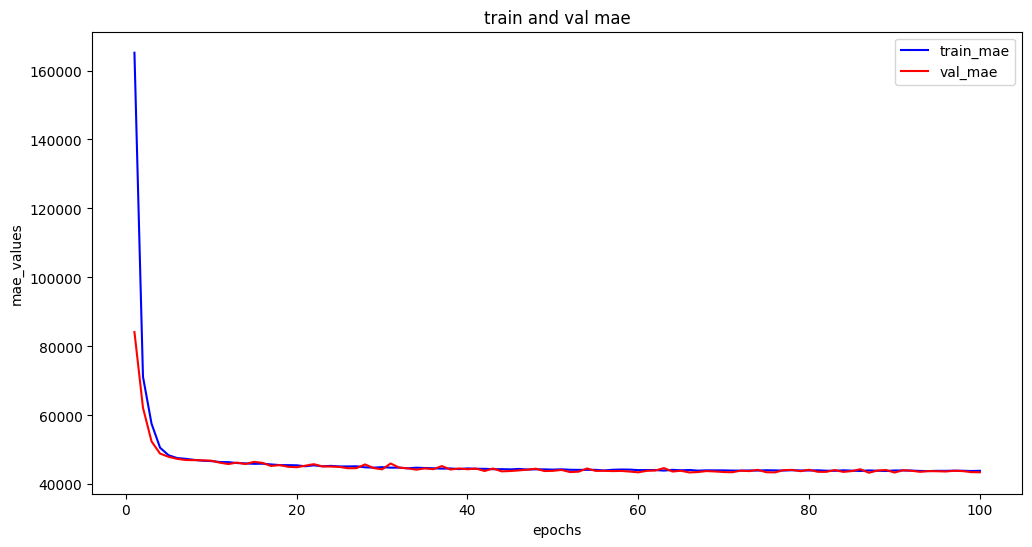

In [34]:
plot_mae(train_mae, val_mae, epochs)


In [35]:
def plot_loss(train_loss, val_loss, epochs):
  plt.clf()
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, train_loss, 'b', label = 'train_loss')
  plt.plot(epochs, val_loss, 'r', label = 'val_loss')
  plt.title('loss and val_loss values')
  plt.xlabel('epochs')
  plt.ylabel('loss_values')
  plt.legend()
  plt.show()


<Figure size 640x480 with 0 Axes>

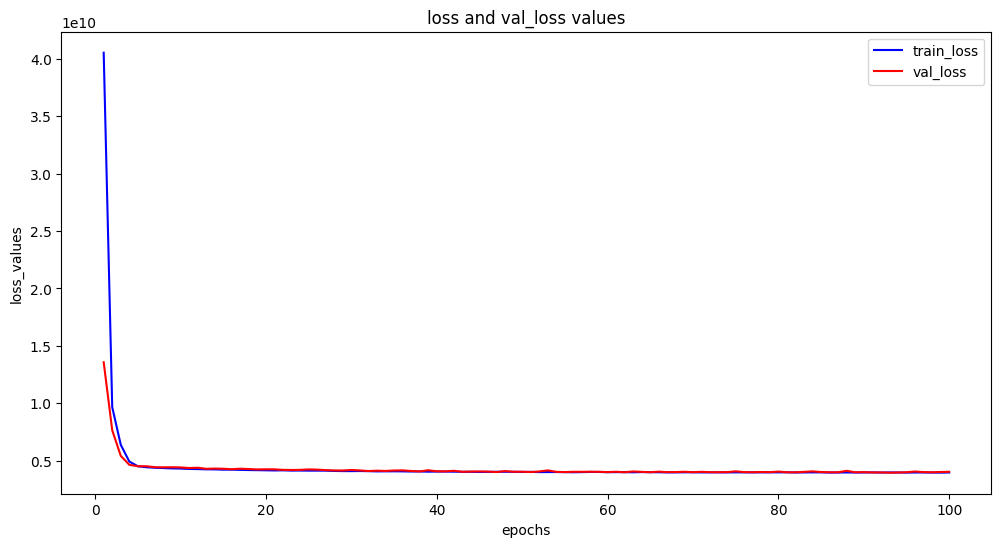

In [36]:
plot_loss(train_loss, val_loss, epochs)


---

#### Step 10: Predict using the trained model

In [46]:
predictions = model.predict(x_test)

target_prediction = 10

prediction = predictions[target_prediction]
actual_target = y_test[target_prediction]

print(f'This is the predicted value: {prediction}')
print(f'This is the actual value: {actual_target}')

print(f'{actual_target - prediction} away from the target')


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
This is the predicted value: [278425.]
This is the actual value: [206300.]
[-72125.] away from the target


Based on what we've got on our experiment, it seems our model it is not capable of predicting at a decent level the actual values. As a result, the model in some cases is almost near the actual value, while in others it is still far away from the expected prediction.

In conclusion, we've learned that something is missing in this problem, unfortunately I'm not able to figure out what it is. At this point, we've tried the following adjustments:

- increasing/decreasing the number of layers (from 6 to 2)
- increasing/decreasing the number of neurons on each layer (from 1024 to 32)
- increasing/decreasing the learning rate on the optimizer function (from 0.1 to 0.005)
- increasing/decreasing the batch size (from 512 to 32)
- increasing/decreasing the number of epochs (from to 200 to 10)

Until then, I will keep looking to the answer.

---